# An Analysis National Parks Biodiversity Data

### Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations. This project will prepare, analyze, and plot data, as well as explain findings from the analysis.

### Project Goals

The prompt for this project is that the National Park Service wants to ensure the survival of at-risk species and maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks.

Questions this project aims to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which mammal is most prevalent and what is their distribution amongst parks?

In the project, descriptive statistics and data visualization techniques will be used to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

* Distributions
* counts
* relationship between species
* conservation status of species
* observations of species in parks. 

Lastly, the goals will be revisted to determine if the analysis has addressed them.

### Data

This project has two data sets that came with the package. Both `Species_info.csv` and `Observations.csv` was provided by Codecademy Data Science course. The first csv file has information about each species and the second has observations of species with park locations. This data will be used to address the goals of the project.

### Setup: Import Libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading the Data

Reading in the CSVs as DataFrames and previewing the data. I can see that **the species_info data file has NaN values** in the conservation_status variable. I have some domain knowledge and know that **the observations variable in the observations data file lists the number of observations of the species made in that past 7 days**.

In [4]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Check Number of Rows and Columns of the DataFrames

In [6]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


### Explore the Data

#### Exploring the Species dataset

Determining the number of species in the dataset.

In [7]:
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


Number and values of unique species in the dataset.

In [8]:
print(f"nnumber of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

nnumber of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Count of each species category. Vascular plant are the largest category with 4,470 and reptile is the smallest with 79.

In [9]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Number and values of unique Conservation Statuses.

In [10]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Count of each conservation status. There are 5,633 `nan` values. I have some domain knowledge and know that these are species without concerning statuses. Other than those, there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.

In [11]:
print(f"na values:{species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


#### Exploring the Observations dataset

Number of national parks in the dataset and their values.

In [12]:
print(f"number of parks:{observations.park_name.nunique()}")
print(f"unique parks:{observations.park_name.unique()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Total number of observations logged in the parks: 3,314,739 sightings in the last 7 days.

In [13]:
print(f"number of observations:{observations.observations.sum()}")

number of observations:3314739


## Analysis

This section will begin the analysis by cleaning and exploring the conservation_status column in the species dataset. 

The `conservation_status` column's possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

We can convert the `NaN` values to `No Intervention`.

In [14]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Creating a table and chart below to explore conservation status by species category.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal. Birds are potentially recovering more than mammals.

In [18]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
.groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

print(conservationCategory)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


Text(0, 0.5, 'Number of Species')

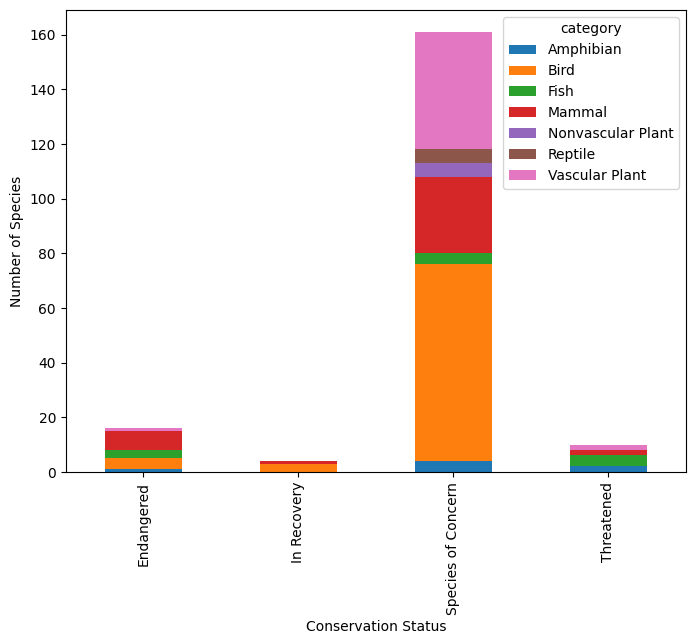

In [19]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

#### Are certain types of species more likely to be endangered?

This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention` since other conservation status labels indicate intervention or species protection.

In [20]:
species['is_protected'] = species.conservation_status != 'No Intervention'

Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [25]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
                        .pivot(columns='is_protected',index='category',values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

print(category_counts)

            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46


Calculating the rate of protection for each `category` for more insight. ~17 percent of mammals were under protection, as well as ~15 percent of birds. 

In [28]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### Statistical Significance

Run **chi-squared tests** to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. We'll start with mammals and birds.

The second value returned by the chi-squared test is the p-value, 0.69. Using a significance threshold of 0.05, we can conclude that there isn't a significant relationship between their protection rates. 

In [29]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The next pair, is going to test the difference between Reptile and Mammal.

**This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles.**

In [31]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

#### Which mammal is most prevalent and what is their distribution amongst parks?

The first step to answer this is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. Looking over the data, we can see that the common name always includes the animal name. The data will be need to be split up into individual names.

In [33]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"].common_names.apply(remove_punctuations).str.split().tolist()

#preview the list
common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

In [34]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next, the words need to be collapsed into one list for easier use.

In [46]:
combined_list = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
print(combined_list[:6])

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']


Now the data is ready to be able to count the number of occurrences of each word. From this analysis, it seems that `Bat` occurred 23 times while `Shrew` came up 18 times.

In [50]:
words_counted = []

for i in combined_list:
    x = combined_list.count(i)
    words_counted.append((i,x))

counted_words = pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False)
counted_words.head(10)

,Word,Count
180,Bat,23
59,Shrew,18
76,Myotis,17
3,Mouse,16
192,Chipmunk,13
154,Squirrel,12
54,American,12
118,Vole,11
36,Eastern,11
184,Mountain,10


## Conclusions


This project was also able to answer most of the questions posed in the Project Goals section:

- What is the distribution of conservation status for species?
    - The majority of species were not conserved (5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest rate of conservation.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which mammals is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times in the observations.
